# EDA on car ads data

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import numpy as np
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
df = pd.read_csv('../data/external/car_ads.csv')

In [5]:
df.columns

Index(['maker', 'model', 'mileage', 'manufacture_year', 'engine_displacement',
       'engine_power', 'body_type', 'color_slug', 'stk_year', 'transmission',
       'door_count', 'seat_count', 'fuel_type', 'date_created',
       'date_last_seen', 'price_eur'],
      dtype='object')

In [6]:
df.shape

(3552912, 16)

In [7]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


In [8]:
df.head(10)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,date_created,date_last_seen,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,2015-11-14 18:10:06.838319+00,2016-01-27 20:40:15.46361+00,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.853411+00,2016-01-27 20:40:15.46361+00,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.861792+00,2016-01-27 20:40:15.46361+00,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.872313+00,2016-01-27 20:40:15.46361+00,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.880335+00,2016-01-27 20:40:15.46361+00,2738.71
5,skoda,fabia,140932.0,2003.0,1200.0,40.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.894643+00,2016-01-27 20:40:15.46361+00,1628.42
6,skoda,fabia,167220.0,2001.0,1400.0,74.0,NaN,NaN,None,man,5,5,gasoline,2015-11-14 18:10:06.915376+00,2016-01-27 20:40:15.46361+00,2072.54
7,bmw,NaN,148500.0,2009.0,2000.0,130.0,NaN,NaN,None,auto,5,5,diesel,2015-11-14 18:10:06.924123+00,2016-01-27 20:40:15.46361+00,10547.74
8,skoda,octavia,105389.0,2003.0,1900.0,81.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.936239+00,2016-01-27 20:40:15.46361+00,4293.12
9,NaN,NaN,301381.0,2002.0,1900.0,88.0,NaN,NaN,None,man,5,5,diesel,2015-11-14 18:10:06.954319+00,2016-01-27 20:40:15.46361+00,1332.35


### The dataset have four categorical data 
   - maker
   - model
   - transmission
   - fuel_type

In [9]:
df.info()
    

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552912 entries, 0 to 3552911
Data columns (total 16 columns):
 #   Column               Dtype  
---  ------               -----  
 0   maker                object 
 1   model                object 
 2   mileage              float64
 3   manufacture_year     float64
 4   engine_displacement  float64
 5   engine_power         float64
 6   body_type            object 
 7   color_slug           object 
 8   stk_year             object 
 9   transmission         object 
 10  door_count           object 
 11  seat_count           object 
 12  fuel_type            object 
 13  date_created         object 
 14  date_last_seen       object 
 15  price_eur            float64
dtypes: float64(5), object(11)
memory usage: 433.7+ MB


In [10]:
df.describe()

,mileage,manufacture_year,engine_displacement,engine_power,price_eur
count,3.190328e+06,3.182334e+06,2.809498e+06,2.998035e+06,3.552912e+06
mean,1.158140e+05,2.000871e+03,2.043958e+03,9.846796e+01,1.625812e+06
std,3.422508e+05,8.172588e+01,1.973958e+03,4.907309e+01,2.025622e+09
min,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,4.000000e-02
25%,1.880000e+04,2.004000e+03,1.400000e+03,6.800000e+01,1.295340e+03
50%,8.641500e+04,2.009000e+03,1.798000e+03,8.600000e+01,7.364910e+03
75%,1.580250e+05,2.013000e+03,1.997000e+03,1.100000e+02,1.628423e+04
max,9.999999e+06,2.017000e+03,3.276700e+04,2.237000e+03,2.706149e+12


- Here the mean value is less than mediadn value of mileage 
- There is notably a large difference between 75th %tile and max values of predictor mileage
- This suggests that there are extreme values-outliers in our data set

In [36]:
df = df.drop(['date_created','date_last_seen'],axis = 1)

#### Since 'date_created','date_last_seen' doesnot have much significane on predicting price, we removed it

In [12]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,color_slug,stk_year,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,NaN,None,man,5,7,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,NaN,None,man,5,5,diesel,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,NaN,None,man,5,5,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,NaN,None,man,5,5,gasoline,2738.71


In [13]:
df['price_eur'].describe()

count    3.552912e+06
mean     1.625812e+06
std      2.025622e+09
min      4.000000e-02
25%      1.295340e+03
50%      7.364910e+03
75%      1.628423e+04
max      2.706149e+12
Name: price_eur, dtype: float64

## Missing data


In [15]:
total =  df.isna().sum().sort_values(ascending=False)
percent =  (df.isna().sum()/df.isna().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data

,Total,Percent
color_slug,3343411,0.941034
fuel_type,1847606,0.520026
stk_year,1708156,0.480776
model,1133361,0.318995
body_type,1122914,0.316055
seat_count,749489,0.210951
engine_displacement,743414,0.209241
transmission,741630,0.208739
door_count,614373,0.172921
engine_power,554877,0.156175


- 94% of color_slug data are missing which is pretty high followed by fuel_type, stk_year
- We will drop color_slug, stk_year

In [37]:
df = df.drop(['color_slug','stk_year'],axis = 1)

In [38]:
df.head()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,man,5,7,diesel,10584.75
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,man,5,5,diesel,8882.31
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,man,5,5,diesel,12065.06
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,man,5,5,gasoline,2960.77
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,man,5,5,gasoline,2738.71


#### since we have lots of data, we will drop all the rows with Null/NaN values

In [39]:
df.dropna()

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur
507,mercedes-benz,viano,203593.0,2011.0,2143.0,120.0,van,man,5,5,diesel,22168.76
898,ford,s-max,137316.0,2011.0,2000.0,103.0,van,man,5,5,diesel,9437.45
1007,hyundai,matrix,182000.0,2002.0,1795.0,90.0,van,man,5,5,gasoline,1073.28
1079,chrysler,town-country,122800.0,2012.0,3604.0,214.0,van,auto,5,7,gasoline,18467.80
1603,fiat,doblo,155623.0,2006.0,1910.0,77.0,van,man,4,5,diesel,3515.91
...,...,...,...,...,...,...,...,...,...,...,...,...
3550257,audi,a4,153000.0,2001.0,1984.0,96.0,sedan,man,4.0,5.0,gasoline,1295.34
3550258,citroen,c3,151433.0,2008.0,1360.0,54.0,coupe,man,5.0,5.0,gasoline,1295.34
3550261,fiat,stilo,210000.0,2002.0,1910.0,85.0,coupe,man,5.0,5.0,diesel,1295.34
3550264,volkswagen,passat,183589.0,2006.0,1968.0,103.0,stationwagon,auto,5.0,5.0,diesel,1295.34


In [40]:
df.shape

(3552912, 12)

In [20]:
# removing values of stk_year with None values

# df = df.replace(to_replace='None', value=np.nan).dropna()

In [21]:
# df.head()

In [22]:
# df.shape

### converting categorical features i.e fuel_type

In [41]:
pd.get_dummies(df['fuel_type'],drop_first=True).head()

,diesel,electric,gasoline,lpg
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,0,0,1,0
4,0,0,1,0


In [42]:
fuel_type = pd.get_dummies(df['fuel_type'],drop_first=True)

In [43]:
df = pd.concat([df,fuel_type],axis=1)

In [44]:
df.head(10)

,maker,model,mileage,manufacture_year,engine_displacement,engine_power,body_type,transmission,door_count,seat_count,fuel_type,price_eur,diesel,electric,gasoline,lpg
0,ford,galaxy,151000.0,2011.0,2000.0,103.0,NaN,man,5,7,diesel,10584.75,1,0,0,0
1,skoda,octavia,143476.0,2012.0,2000.0,81.0,NaN,man,5,5,diesel,8882.31,1,0,0,0
2,bmw,NaN,97676.0,2010.0,1995.0,85.0,NaN,man,5,5,diesel,12065.06,1,0,0,0
3,skoda,fabia,111970.0,2004.0,1200.0,47.0,NaN,man,5,5,gasoline,2960.77,0,0,1,0
4,skoda,fabia,128886.0,2004.0,1200.0,47.0,NaN,man,5,5,gasoline,2738.71,0,0,1,0
5,skoda,fabia,140932.0,2003.0,1200.0,40.0,NaN,man,5,5,gasoline,1628.42,0,0,1,0
6,skoda,fabia,167220.0,2001.0,1400.0,74.0,NaN,man,5,5,gasoline,2072.54,0,0,1,0
7,bmw,NaN,148500.0,2009.0,2000.0,130.0,NaN,auto,5,5,diesel,10547.74,1,0,0,0
8,skoda,octavia,105389.0,2003.0,1900.0,81.0,NaN,man,5,5,diesel,4293.12,1,0,0,0
9,NaN,NaN,301381.0,2002.0,1900.0,88.0,NaN,man,5,5,diesel,1332.35,1,0,0,0


In [109]:
df.drop(['fuel_type'],axis=1,inplace=True)

### Data transformation

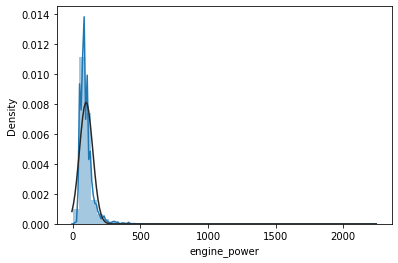

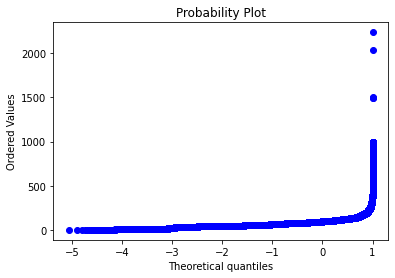

In [28]:

#histogram and normal probability plot
sns.distplot(df['engine_power'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['engine_power'], plot=plt)

'engine_power' is **not normal**.It shows 'peakedness', positive skewness and does not follow the diagonal line. A simple data transformation can solve the problem. In case of positive skewness, **log transformations** usually works well. 

In [29]:
#applying log transformation
df['engine_power'] = np.log(df['engine_power'])


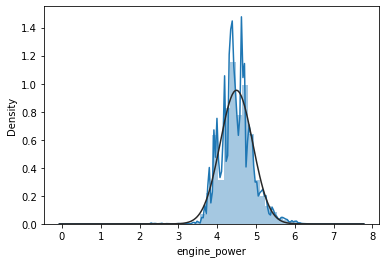

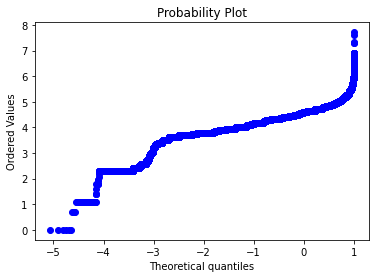

In [30]:
#histogram and normal probability plot
sns.distplot(df['engine_power'], fit=norm);
fig = plt.figure()
res = stats.probplot(df['engine_power'], plot=plt)

## Seat count and Door Count

In [58]:
df['door_count'].value_counts()

5.0     777522
4       636217
4.0     494524
None    475693
2       164077
2.0     143747
5       116562
3.0     106527
3        14066
0.0       8010
6.0        906
6          347
1.0        259
7.0         41
1           14
55.0         9
9.0          4
58.0         3
8.0          3
7            2
77.0         1
54.0         1
45.0         1
22.0         1
17.0         1
49.0         1
Name: door_count, dtype: int64

In [60]:
df['seat_count'].value_counts()

5.0      1084557
5         683311
None      537610
4.0       147294
4          97503
          ...   
515.0          1
517.0          1
23             1
74             1
26.0           1
Name: seat_count, Length: 88, dtype: int64

In [65]:
print("Unique door count values:",list(df['door_count'].unique()))
print("Unique seat count values:",list(df['seat_count'].unique()))

Unique door count values: ['5', '3', '4', 'None', '2', '6', '1', '7', nan, 5.0, 4.0, 3.0, 2.0, 6.0, 1.0, 9.0, 7.0, 8.0, 77.0, 58.0, 54.0, 0.0, 55.0, 22.0, 45.0, 17.0, 49.0]
Unique seat count values: ['7', '5', '4', 'None', '6', '9', '8', '2', '3', '1', '18', '20', '10', '11', '15', '12', '16', '14', '50', '17', '74', '65', '19', '54', '13', '27', '45', '24', '56', '22', '255', '23', '57', '25', nan, 5.0, 3.0, 4.0, 2.0, 7.0, 8.0, 6.0, 9.0, 23.0, 1.0, 51.0, 12.0, 15.0, 14.0, 55.0, 19.0, 61.0, 21.0, 13.0, 17.0, 20.0, 10.0, 11.0, 18.0, 45.0, 27.0, 53.0, 26.0, 56.0, 58.0, 25.0, 30.0, 36.0, 54.0, 24.0, 16.0, 57.0, 74.0, 50.0, 0.0, 29.0, 52.0, 32.0, 44.0, 512.0, 33.0, 515.0, 59.0, 85.0, 517.0, 81.0, 43.0, 49.0, 138.0]


In [66]:
# Replaing None with nan
df['door_count'].replace('None', np.NaN, inplace=True)
df['seat_count'].replace('None', np.NaN, inplace=True)

In [67]:
#converting string to float
df['door_count'] = df['door_count'].astype(float)
df['seat_count'] = df['seat_count'].astype(float)

In [68]:
print("Unique door count values:",list(df['door_count'].unique()))
print("Unique seat count values:",list(df['seat_count'].unique()))

Unique door count values: [5.0, 3.0, 4.0, nan, 2.0, 6.0, 1.0, 7.0, 9.0, 8.0, 77.0, 58.0, 54.0, 0.0, 55.0, 22.0, 45.0, 17.0, 49.0]
Unique seat count values: [7.0, 5.0, 4.0, nan, 6.0, 9.0, 8.0, 2.0, 3.0, 1.0, 18.0, 20.0, 10.0, 11.0, 15.0, 12.0, 16.0, 14.0, 50.0, 17.0, 74.0, 65.0, 19.0, 54.0, 13.0, 27.0, 45.0, 24.0, 56.0, 22.0, 255.0, 23.0, 57.0, 25.0, 51.0, 55.0, 61.0, 21.0, 53.0, 26.0, 58.0, 30.0, 36.0, 0.0, 29.0, 52.0, 32.0, 44.0, 512.0, 33.0, 515.0, 59.0, 85.0, 517.0, 81.0, 43.0, 49.0, 138.0]


In [72]:
print('Average seat:',df['seat_count'].mean(), '\n Average door:',df['seat_count'].mean())

Average seat: 4.8667078902569765 
 Average door: 4.8667078902569765


In [73]:
# decreasing data size
# removin data with door_ount >6 and seat_count>10
df = df.drop(df[df['door_count']  > 6].index)
df = df.drop(df[df['seat_count']  > 10].index)

In [74]:
df.shape

(3552532, 16)

<AxesSubplot:xlabel='seat_count', ylabel='door_count'>

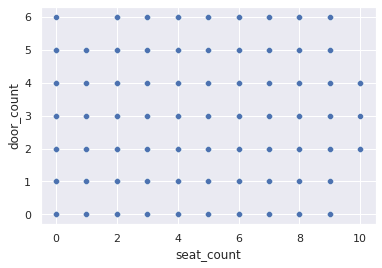

In [75]:
sns.scatterplot(df['seat_count'],df['door_count'])


In [88]:
#Removing cars with 0 seats
np_values=df.loc[(df['seat_count']==0)].index
print("Cars with 0 seats:",len(np_values))
df.drop(np_values,inplace=True)

Cars with 0 seats: 11690


<AxesSubplot:xlabel='seat_count', ylabel='door_count'>

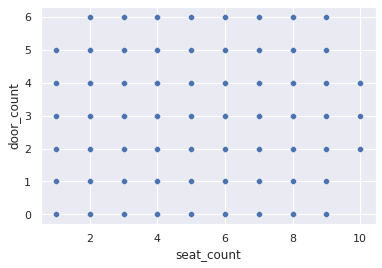

In [89]:
sns.scatterplot(df['seat_count'],df['door_count'])


In [90]:
#There are cars with 1 seat but 5 doors which is also impossible
np_values=df.loc[(df['door_count']>2*df['seat_count'])].index
print('Cars with the number of doors twice the number seats:',len(np_values))
df.drop(np_values, inplace=True)

Cars with the number of doors twice the number seats: 2769


<AxesSubplot:xlabel='seat_count', ylabel='door_count'>

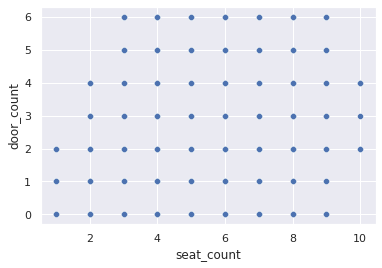

In [91]:
sns.scatterplot(df['seat_count'],df['door_count'])


In [92]:
#There are cars with 0 doors which is also impossible
#Removing cars with 0 seats
np_values=df.loc[(df['door_count']==0)].index
print("Cars with 0 doors:",len(np_values))
df.drop(np_values,inplace=True)

Cars with 0 doors: 3238


<AxesSubplot:xlabel='seat_count', ylabel='door_count'>

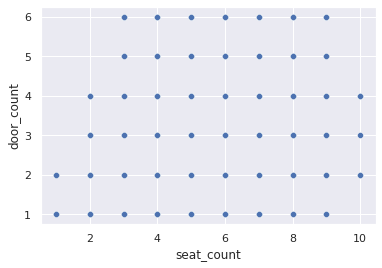

In [93]:
sns.scatterplot(df['seat_count'],df['door_count'])


In [95]:
df.shape

(3534835, 16)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


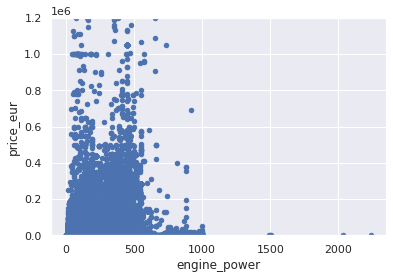

In [100]:
#bivariate analysis saleprice/grlivarea
var = 'engine_power'
data = pd.concat([df['price_eur'], df[var]], axis=1)
data.plot.scatter(x=var, y='price_eur', ylim=(0,1200000));

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


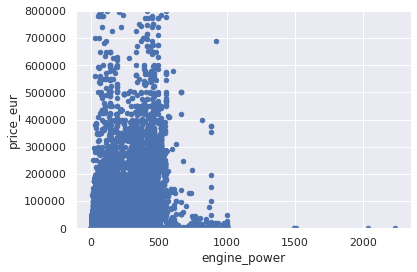

In [98]:
#bivariate analysis saleprice/grlivarea
var = 'engine_power'
data = pd.concat([df['price_eur'], df[var]], axis=1)
data.plot.scatter(x=var, y='price_eur', ylim=(0,800000));

In [101]:
#replacing NaN with average value for numerical variables
df['mileage'].fillna((df['mileage'].mean()), inplace=True)
df['engine_displacement'].fillna((df['engine_displacement'].mean()), inplace=True)
df['engine_power'].fillna((df['engine_power'].mean()), inplace=True)
df['door_count'].fillna((df['door_count'].mean()), inplace=True)
df['seat_count'].fillna((df['seat_count'].mean()), inplace=True)

#replacing NaN with most frequent values in object variables
df['manufacture_year'].fillna(df['manufacture_year'].value_counts().index[0], inplace=True)
df['body_type'].fillna(df['body_type'].value_counts().index[0], inplace=True)
df['transmission'].fillna(df['transmission'].value_counts().index[0], inplace=True)
df['model'].fillna(df['model'].value_counts().index[0], inplace=True)
df['maker'].fillna(df['maker'].value_counts().index[0], inplace=True)

In [111]:
df.isnull().sum()

maker                  0
model                  0
mileage                0
manufacture_year       0
engine_displacement    0
engine_power           0
body_type              0
transmission           0
door_count             0
seat_count             0
price_eur              0
diesel                 0
electric               0
gasoline               0
lpg                    0
dtype: int64

<AxesSubplot:>

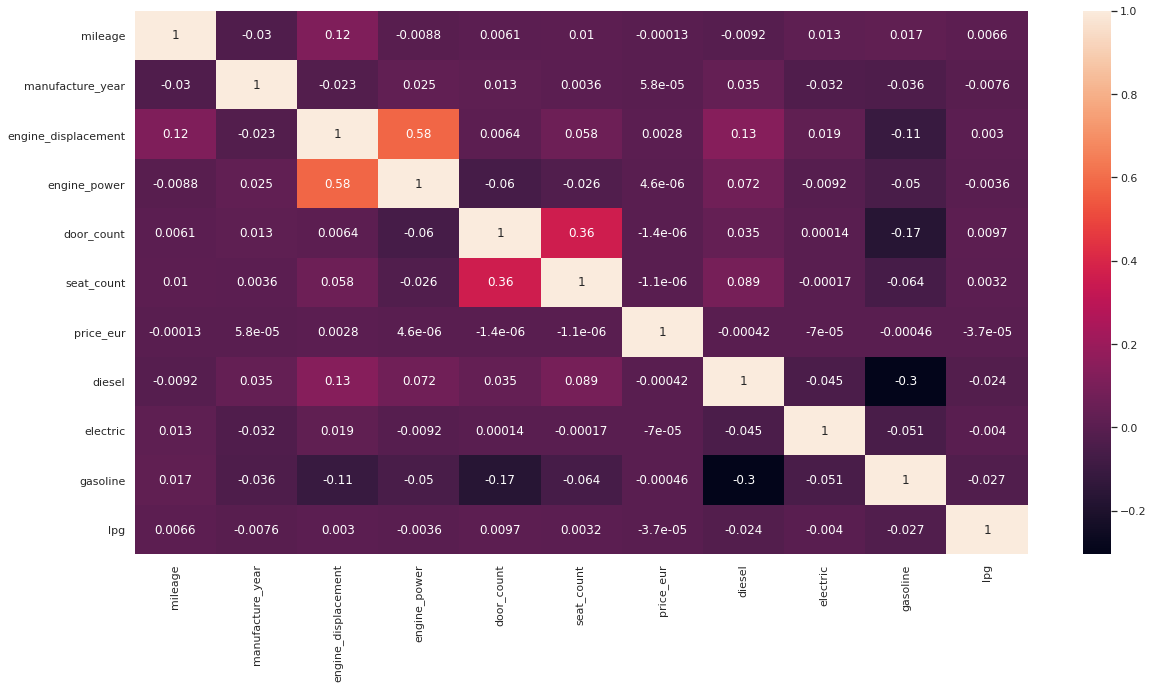

In [112]:
#correlation 
corr = df.corr()
fig_dims = (20, 10)
fig, ax = plt.subplots(figsize=fig_dims)

sns.heatmap(corr, annot=True)

MemoryError: Unable to allocate 102. GiB for an array with shape (13723437160,) and data type float64

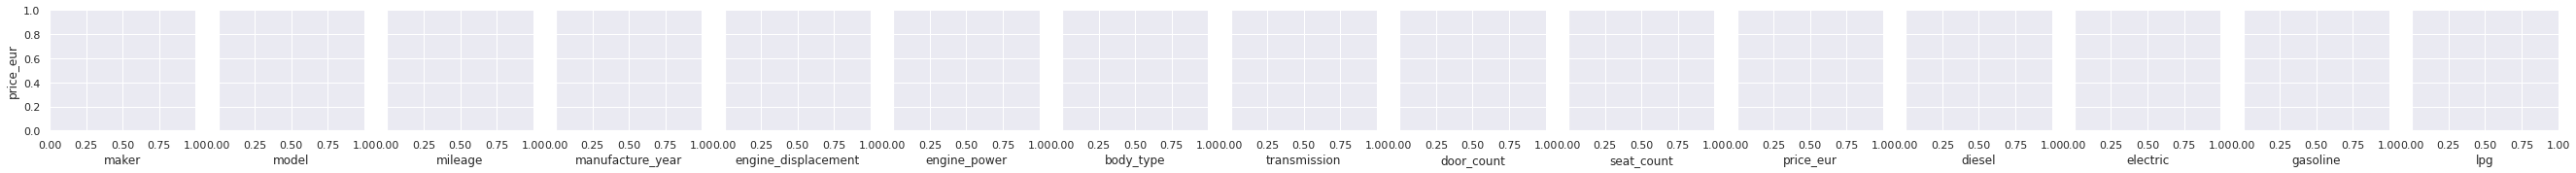

In [117]:
#pairplot
sns.pairplot(df, y_vars="price_eur", x_vars=df.columns.values)